**TASK 2- PREDICTION USING UNSUPERVISED LEARNING**



**NAME : BIPASHA SIKARWAR**

K-MEANS CLUSTERING 



DATASET-https://bit.ly/3kXTdox

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
iris=pd.read_csv("/content/Iris.csv")

In [ ]:
# Load the iris dataset

iris.head() # See the first 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
iris.shape

(150, 6)

**Visualizing data**

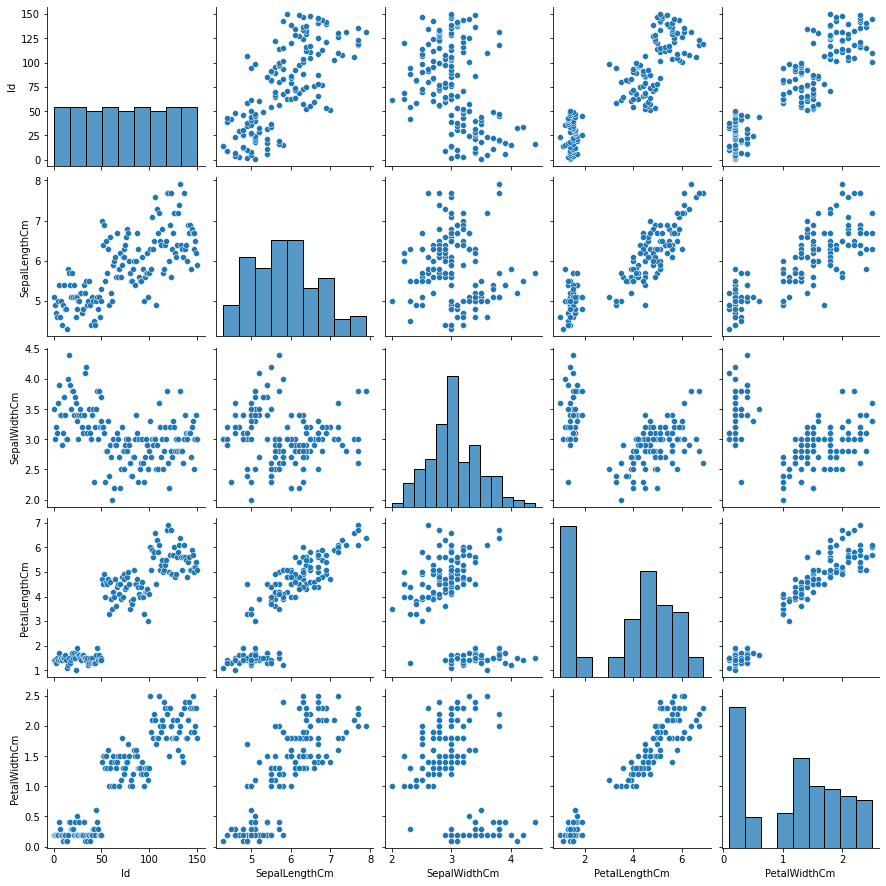

In [ ]:
sns.pairplot(iris)

In [ ]:
iris.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [ ]:
iris.Species.nunique()

3

In [ ]:
iris.min()

Id                         1
SepalLengthCm            4.3
SepalWidthCm               2
PetalLengthCm              1
PetalWidthCm             0.1
Species          Iris-setosa
dtype: object

In [ ]:
iris.max()

Id                          150
SepalLengthCm               7.9
SepalWidthCm                4.4
PetalLengthCm               6.9
PetalWidthCm                2.5
Species          Iris-virginica
dtype: object

In [ ]:
iris=iris.drop(columns=["Id"])
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [ ]:
iris.isnull()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


**EXPLORATORY DATA ANALYSIS**

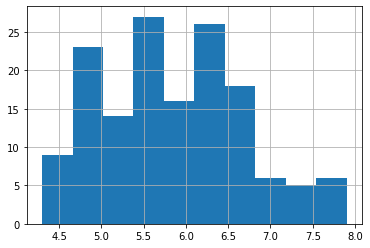

In [ ]:
iris['SepalLengthCm'].hist()

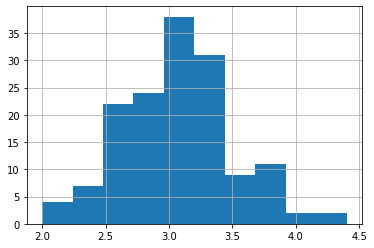

In [ ]:
iris['SepalWidthCm'].hist()

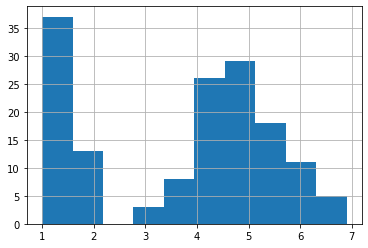

In [ ]:
iris['PetalLengthCm'].hist()

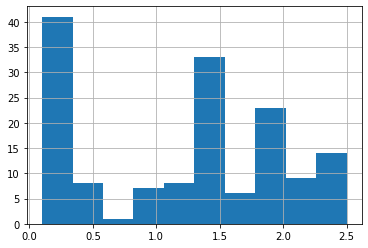

In [ ]:
iris['PetalWidthCm'].hist()

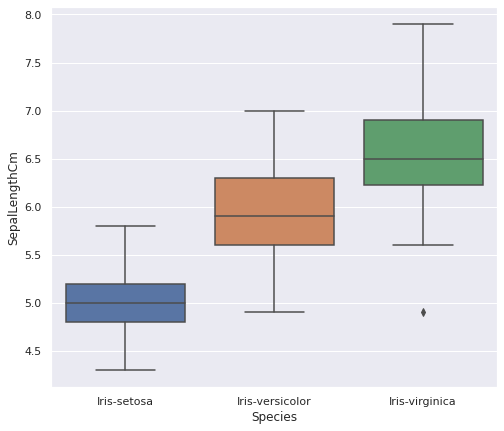

In [ ]:
sns.set(rc={'figure.figsize':(8,7)})
sns.boxplot(x='Species', y='SepalLengthCm',data=iris)

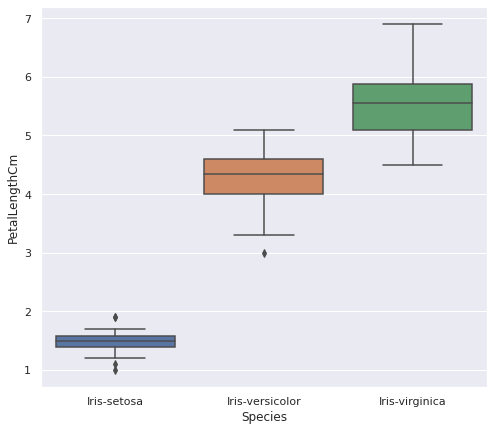

In [ ]:
sns.set(rc={'figure.figsize':(8,7)})
sns.boxplot(x='Species', y='PetalLengthCm',data=iris)

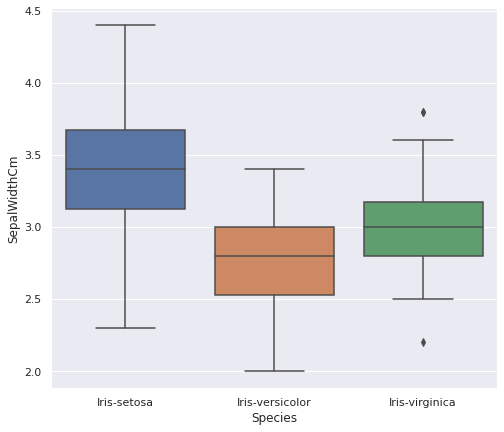

In [ ]:
sns.set(rc={'figure.figsize':(8,7)})
sns.boxplot(x='Species', y='SepalWidthCm',data=iris)

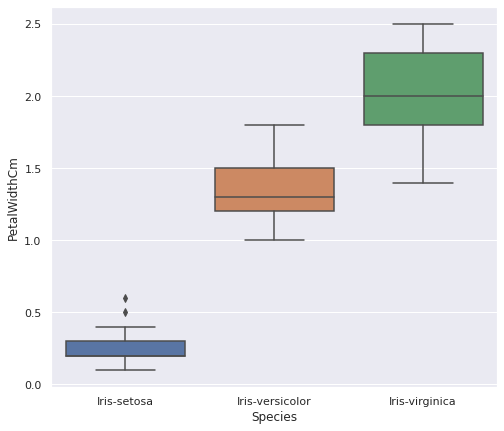

In [ ]:
sns.set(rc={'figure.figsize':(8,7)})
sns.boxplot(x='Species', y='PetalWidthCm',data=iris)

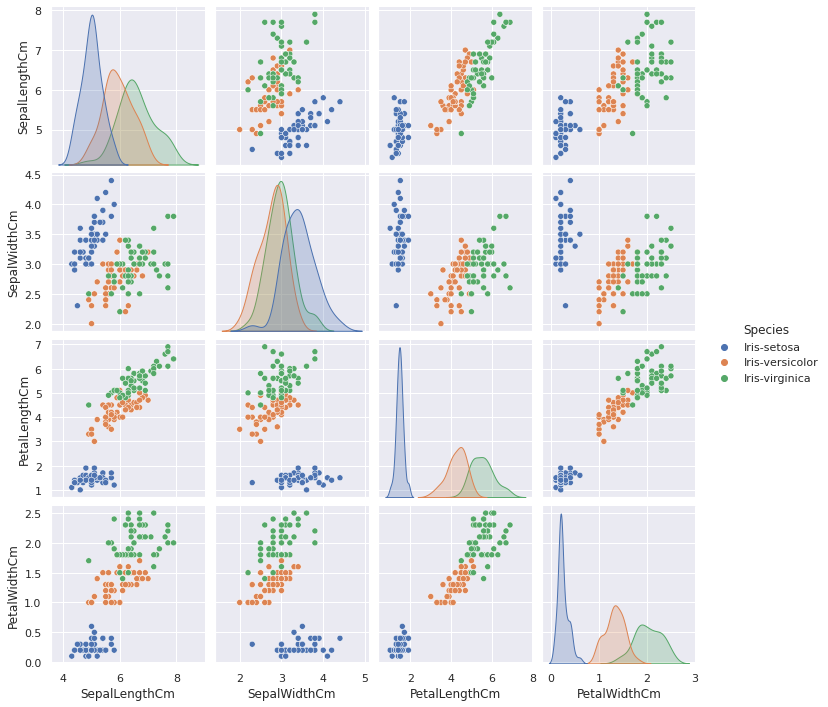

In [ ]:
sns.pairplot(iris,hue='Species')

In [ ]:
colors = ['red', 'blue','orange']
species = ['iris-setosa','iris-versicolor', 'iris-virginica']

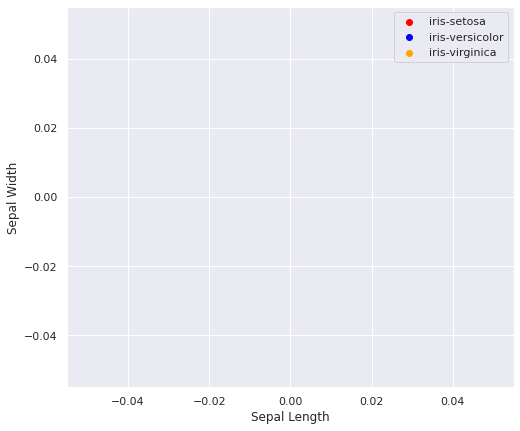

In [ ]:
for i in range(3):
    x= iris[iris['Species']== species[i]]
    plt.scatter(x=x['SepalLengthCm'], y=x['SepalWidthCm'], c=colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

**COOREALATION MATRIX**

In [ ]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


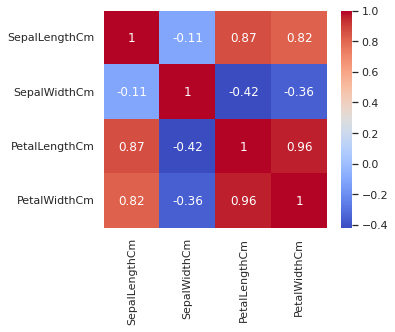

In [ ]:
corr = iris.corr()
plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')


**LABEL ENCODER**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
iris['Species']= le.fit_transform(iris['Species'])
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**FINDING THE OPTIMUM NUMBER OF CLUSTERS**

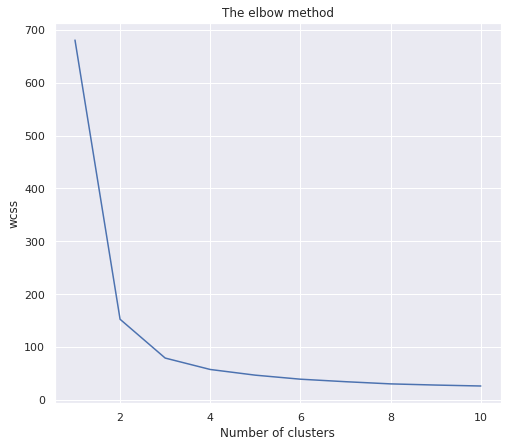

In [ ]:
x = iris.iloc[:, [0,1,2,3]]. values
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init= 'k-means++',
                  max_iter = 300, n_init = 10 , random_state = 0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()



In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

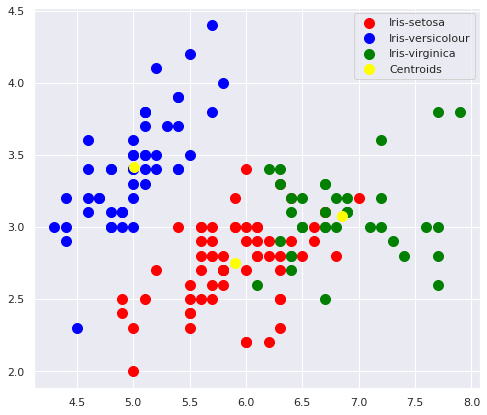

In [ ]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

**MODEL TRAINING**

In [ ]:
from sklearn.model_selection import train_test_split
x = iris.drop(columns=['Species'])
y = iris['Species']
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=1)


**MODEL SELECTION**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [ ]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
svm = SVC() 
nb = GaussianNB()

**EVALUATNG THE MODELS**

In [ ]:
models = [lr,dt,knn,rf,svm,nb]
scores=[]

for model in models:
  model.fit(x_train, y_train)
  pred = model.predict(x_test)
  scores.append(accuracy_score(y_test, pred))
  print("Accuracy of "+type(model).__name__+" is",(accuracy_score(y_test, pred)))


Accuracy of LogisticRegression is 0.9777777777777777
Accuracy of DecisionTreeClassifier is 0.9555555555555556
Accuracy of KNeighborsClassifier is 0.9777777777777777
Accuracy of RandomForestClassifier is 0.9555555555555556
Accuracy of SVC is 0.9777777777777777
Accuracy of GaussianNB is 0.9333333333333333


THANK YOU